In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score
from sklearn.metrics import roc_auc_score, roc_curve

from graphviz import Source 
from sklearn.tree import export_graphviz

from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### 데이터 준비

In [3]:
df = pd.read_csv('final_df.csv')
df.head()

,signup_duration,subscription_duration,content_view,recommended_view,watched_duration,bookmark_count,like_count,dislike_count,rating_count,chrun_19-06,...,login_method_Password,login_method_Social_Login,payment_method_Credit_Card,payment_method_Gift_Card,payment_method_PayPal,category_Animation,category_Documentary,category_Drama,category_Movie,category_Unwatched
0,19.0,18.0,105.0,30.0,109.400556,3.0,0.0,2.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,17.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,30.0,29.0,124.0,23.0,122.255000,2.0,3.0,3.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,40.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,36.0,36.0,74.0,16.0,65.516111,1.0,2.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [4]:
df.describe()

,signup_duration,subscription_duration,content_view,recommended_view,watched_duration,bookmark_count,like_count,dislike_count,rating_count,chrun_19-06,...,login_method_Password,login_method_Social_Login,payment_method_Credit_Card,payment_method_Gift_Card,payment_method_PayPal,category_Animation,category_Documentary,category_Drama,category_Movie,category_Unwatched
count,5443.000000,5443.000000,5443.00000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,...,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000
mean,35.378835,18.190336,55.52618,11.097189,57.790934,1.979239,2.008267,2.027742,2.026823,0.500092,...,0.550799,0.449201,0.332721,0.334926,0.332353,0.095536,0.227632,0.088554,0.100129,0.488150
std,19.871522,22.072468,58.34205,12.027131,60.894050,2.748046,2.790446,2.798672,2.803568,0.500046,...,0.497458,0.497458,0.471231,0.472008,0.471100,0.293980,0.419342,0.284125,0.300199,0.499905
min,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,1.000000,50.00000,8.000000,51.821389,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,53.000000,36.000000,109.00000,21.000000,113.449167,4.000000,4.000000,4.000000,4.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,69.000000,69.000000,229.00000,55.000000,249.994167,16.000000,15.000000,15.000000,18.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- signup_duration : 값과 평균 사이 차이가 큼
- subscription_duration : 이상치가 있어 표준편차가 큼
- content_view : 값 사이의 편차가 큼
- recommended_View : 값 사이의 편차가 큼
- watched_duration : 값 사이의 편차가 큼 
- like_count : 값 사이의 편차가 크며 이상치가 있음
- dislike_count : 값 사이의 편차가 크며 이상치가 있음
- rating_count : 값 사이의 편차가 크며 이상치가 있음

In [6]:
X = df.drop('churn', axis=1)
y = df['churn']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [8]:
columns = ['signup_duration', 'subscription_duration', 'content_view', 'recommended_view', 
                    'watched_duration', 'bookmark_count', 'like_count', 'dislike_count', 'rating_count']

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_train_scaled[columns] = scaler.fit_transform(X_train[columns])

X_test_scaled = X_test.copy()
X_test_scaled[columns] = scaler.transform(X_test[columns])

In [9]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(4354, 29)
(1089, 29)


### 모델링

In [11]:
def get_clf_eval(y_test,pred):
    accuracy = accuracy_score(y_test,pred)
    recall = recall_score(y_test,pred)
    precision = precision_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc = roc_auc_score(y_test,pred)
    return accuracy, recall, precision, f1, roc

def print_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy, recall, precision, f1, roc = get_clf_eval(y_test, pred)
    
    print('confusion matrix')
    print(confusion)
    print('-----------------------------------------------')
    print("정확도: {0:.4f}. 재현율: {1:.4f}, 정밀도: {2:.4f}".format(accuracy, recall, precision))
    print("F1-Score: {0:.4f}. AUC: {1:.4f}".format(f1, roc))

In [12]:
# Decision Tree
dt_clf = DecisionTreeClassifier(random_state=1)
dt_clf.fit(X_train_scaled, y_train)

dt_pred_train = dt_clf.predict(X_train_scaled)
dt_pred_test = dt_clf.predict(X_test_scaled)

print_clf_eval(y_test, dt_pred_test)

confusion matrix
[[356  78]
 [ 49 606]]
-----------------------------------------------
정확도: 0.8834. 재현율: 0.9252, 정밀도: 0.8860
F1-Score: 0.9052. AUC: 0.8727


In [13]:
# Logistic Regression
lr_clf = LogisticRegression(random_state=1)
lr_clf.fit(X_train_scaled, y_train)

lr_pred_train = lr_clf.predict(X_train_scaled)
lr_pred_test = lr_clf.predict(X_test_scaled)

print_clf_eval(y_test, lr_pred_test)

confusion matrix
[[434   0]
 [103 552]]
-----------------------------------------------
정확도: 0.9054. 재현율: 0.8427, 정밀도: 1.0000
F1-Score: 0.9147. AUC: 0.9214


In [14]:
# Neural Network
mlp_clf = MLPClassifier(hidden_layer_sizes=(8,8), max_iter=300)
mlp_clf.fit(X_train_scaled, y_train)

mlp_pred_train = mlp_clf.predict(X_train_scaled)
mlp_pred_test = mlp_clf.predict(X_test_scaled)

print_clf_eval(y_test, mlp_pred_test)

confusion matrix
[[419  15]
 [100 555]]
-----------------------------------------------
정확도: 0.8944. 재현율: 0.8473, 정밀도: 0.9737
F1-Score: 0.9061. AUC: 0.9064


In [15]:
# Ensemble-Voting 
lr_clf = LogisticRegression(random_state=1)
knn_clf = KNeighborsClassifier(n_neighbors=8)
dt_clf = DecisionTreeClassifier(random_state=1)

vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf), ('DT', dt_clf)] , voting='soft') 
vo_clf.fit(X_train_scaled , y_train)

vo_pred_train = vo_clf.predict(X_train_scaled)
vo_pred_test = vo_clf.predict(X_test_scaled)

print_clf_eval(y_test, vo_pred_test)

confusion matrix
[[403  31]
 [ 81 574]]
-----------------------------------------------
정확도: 0.8972. 재현율: 0.8763, 정밀도: 0.9488
F1-Score: 0.9111. AUC: 0.9025


In [16]:
# Ensemble-Random Forest(Bagging) 
rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(X_train_scaled, y_train)

rf_pred_train = rf_clf.predict(X_train_scaled)
rf_pred_test = rf_clf.predict(X_test_scaled)

print_clf_eval(y_test, rf_pred_test)

confusion matrix
[[434   0]
 [102 553]]
-----------------------------------------------
정확도: 0.9063. 재현율: 0.8443, 정밀도: 1.0000
F1-Score: 0.9156. AUC: 0.9221


In [17]:
# Ensemble-LightGBM(Boosting) 
lgbm_clf = LGBMClassifier(random_state=1)
lgbm_clf.fit(X_train_scaled, y_train)

lgbm_pred_train = lgbm_clf.predict(X_train_scaled)
lgbm_pred_test = lgbm_clf.predict(X_test_scaled)

print()
print_clf_eval(y_test, lgbm_pred_test)

[LightGBM] [Info] Number of positive: 2617, number of negative: 1737
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 693
[LightGBM] [Info] Number of data points in the train set: 4354, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.601056 -> initscore=0.409869
[LightGBM] [Info] Start training from score 0.409869

confusion matrix
[[434   0]
 [ 70 585]]
-----------------------------------------------
정확도: 0.9357. 재현율: 0.8931, 정밀도: 1.0000
F1-Score: 0.9435. AUC: 0.9466


### 성능 비교

In [19]:
accs = []

preds = {"Decision Tree": {"train": dt_pred_train, "test": dt_pred_test},
        "Logistic Regression": {"train": lr_pred_train, "test": lr_pred_test},
        "Nerual Network": {"train": mlp_pred_train, "test": mlp_pred_test},
        "Voting": {"train": vo_pred_train, "test": vo_pred_test},
        "Random Forest": {"train": rf_pred_train, "test": rf_pred_test},
        "LightGBM": {"train": lgbm_pred_train, "test": lgbm_pred_test}}

for model_name, pred in preds.items():
    train_acc = accuracy_score(y_train, pred["train"])
    test_acc = accuracy_score(y_test, pred["test"])
    accs.append({"Model": model_name, "Train": train_acc, "Test": test_acc})

accs = pd.DataFrame(accs)
accs

,Model,Train,Test
0,Decision Tree,1.000000,0.883379
1,Logistic Regression,0.897336,0.905418
2,Nerual Network,0.903767,0.894399
3,Voting,0.962563,0.897153
4,Random Forest,1.000000,0.906336
5,LightGBM,0.985990,0.935721


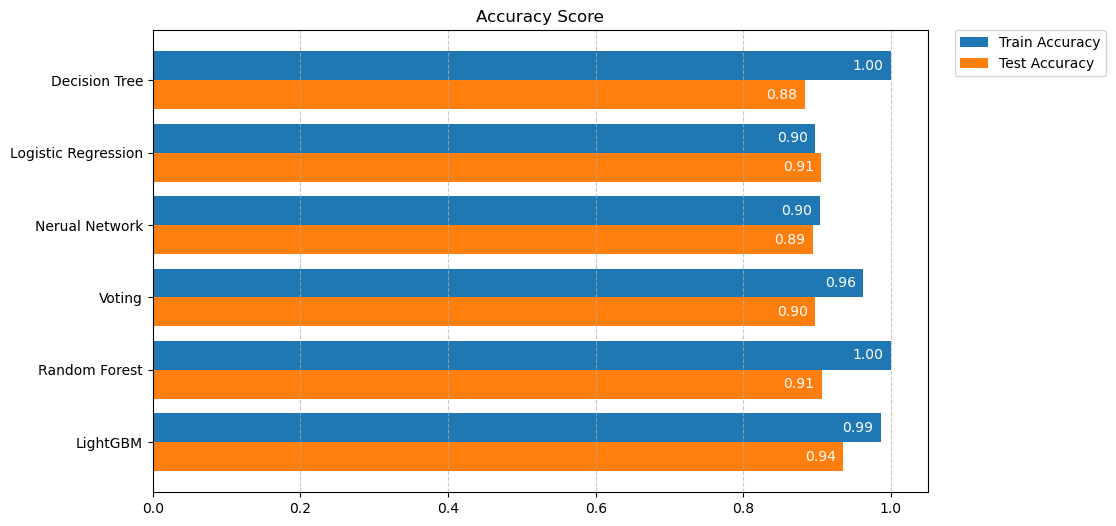

In [20]:
plt.figure(figsize=(10, 6))

bar_width = 0.4
index = range(len(accs["Model"]))
reverse_index = list(reversed(index))

train_bar = plt.barh([i + bar_width / 2 for i in reverse_index], accs["Train"], height=bar_width, label="Train Accuracy")
test_bar = plt.barh([i - bar_width / 2 for i in reverse_index], accs["Test"], height=bar_width, label="Test Accuracy")

for bar in train_bar:
    plt.text(bar.get_width()-0.01, bar.get_y() + bar.get_height() / 2, 
        f"{bar.get_width():.2f}", va="center", ha="right", color='white')

for bar in test_bar:
    plt.text(bar.get_width()-0.01, bar.get_y() + bar.get_height() / 2, 
        f"{bar.get_width():.2f}", va="center", ha="right", color='white')

plt.yticks(reverse_index, accs["Model"])
plt.legend(bbox_to_anchor=(1.23,1), borderaxespad=0)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.title('Accuracy Score')
plt.show()

In [21]:
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    return get_clf_eval(y_test, pred)

def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['Accuracy', 'Recall', 'Precision', 'F1', 'ROC']
    metric = []

    for model in models:
        metric.append(get_result(model, X_train, y_train, X_test, y_test))

    return pd.DataFrame(metric, columns=col_names, index=model_names)

In [22]:
models = [dt_clf, lr_clf, mlp_clf, vo_clf, rf_clf, lgbm_clf]
model_names = ['Decision Tree','Logistic Regression','Nerual Network','Voting','Random Forest','LightGBM']

metrics = get_result_pd(models, model_names, X_train_scaled, y_train, X_test_scaled, y_test)
metrics

[LightGBM] [Info] Number of positive: 2617, number of negative: 1737
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000388 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 693
[LightGBM] [Info] Number of data points in the train set: 4354, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.601056 -> initscore=0.409869
[LightGBM] [Info] Start training from score 0.409869


,Accuracy,Recall,Precision,F1,ROC
Decision Tree,0.883379,0.925191,0.885965,0.905153,0.872734
Logistic Regression,0.905418,0.842748,1.000000,0.914664,0.921374
Nerual Network,0.901745,0.848855,0.985816,0.912223,0.915211
Voting,0.897153,0.876336,0.948760,0.911111,0.902454
Random Forest,0.906336,0.844275,1.000000,0.915563,0.922137
LightGBM,0.935721,0.893130,1.000000,0.943548,0.946565


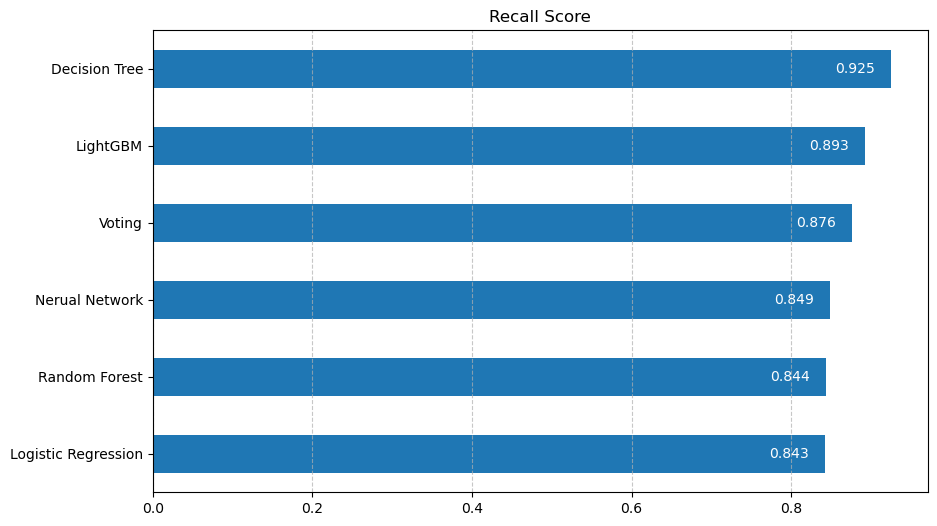

In [23]:
plt.figure(figsize=(10, 6))

sorted_recall = metrics['Recall'].sort_values(ascending=True)
sorted_recall.plot(kind='barh', title='Recall Score')

for index, value in enumerate(sorted_recall):
    plt.text(value - 0.07, index, f'{value:.3f}', va='center', color='white')

plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

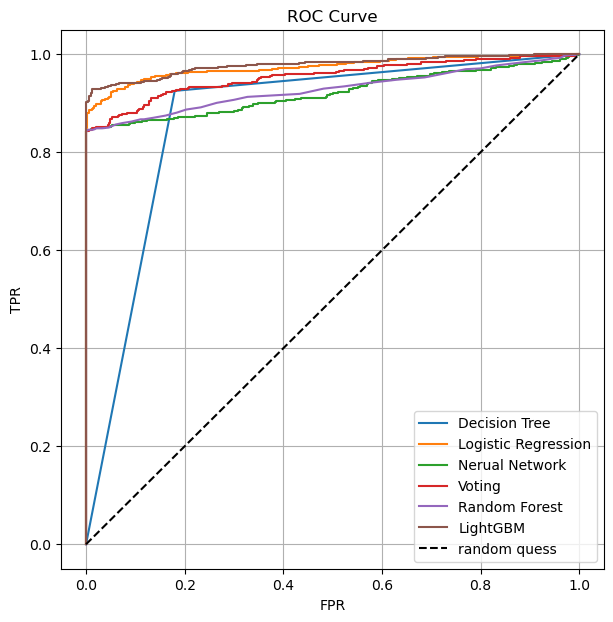

In [24]:
def draw_roc_curve(models, model_names, X_test, y_test):
    plt.figure(figsize=(7,7))
    
    for model in range(len(models)):
        pred = models[model].predict_proba(X_test)[:,1]
        fall_out, recall, thresholds = roc_curve(y_test, pred)
        plt.plot(fall_out, recall, label=model_names[model])

    plt.plot([0,1], [0,1], 'k--', label='random quess')
    plt.title('ROC Curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    
    plt.legend()
    plt.grid()
    plt.show()

draw_roc_curve(models, model_names, X_test_scaled, y_test)

- 고객 이탈 예측 시, 이탈 예정 고객(FN)을 놓치지 않는 것이 중요하므로 재현율(Recall)을 주목해서 봐야 한다.
- 정확도는 LightGBM, 랜덤 포레스트, 로지스틱 회귀 순으로 높았으나, 재현율은 의사결정나무, LightGBM, Voting 순으로 나타났다.
- 의사결정나무는 성능이 좋더라도 과적합 우려가 있어 선택을 지양하고자 한다.

### 이탈 요인 분석

In [27]:
lgbm_imp_values = lgbm_clf.feature_importances_ 
lgbm_imp = pd.Series(lgbm_imp_values, index=X.columns)
lgbm_imp_top20 = lgbm_imp.sort_values(ascending=False)[:20]

rf_imp_values = rf_clf.feature_importances_ 
rf_imp = pd.Series(rf_imp_values, index=X.columns)
rf_imp_top20 = rf_imp.sort_values(ascending=False)[:20]

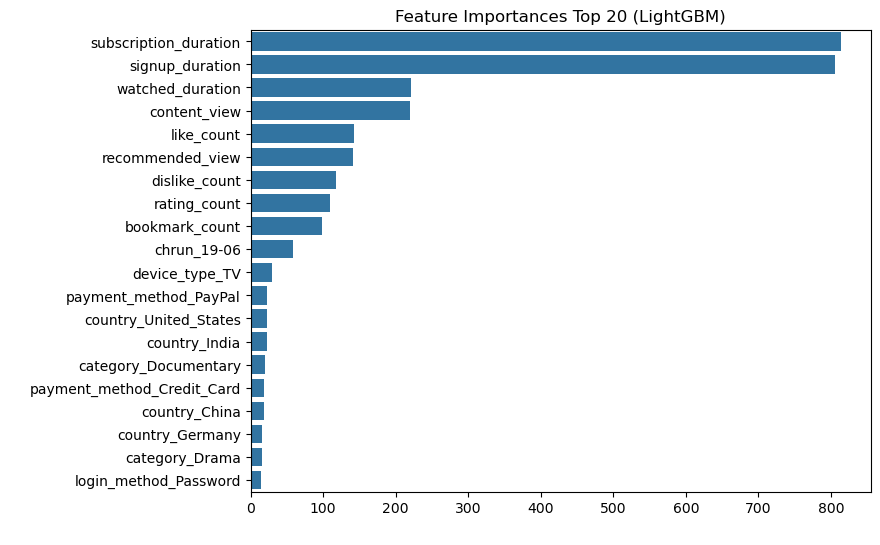

In [28]:
plt.figure(figsize=(8, 6))
plt.title('Feature Importances Top 20 (LightGBM)')
sns.barplot(x=lgbm_imp_top20 , y = lgbm_imp_top20.index)
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

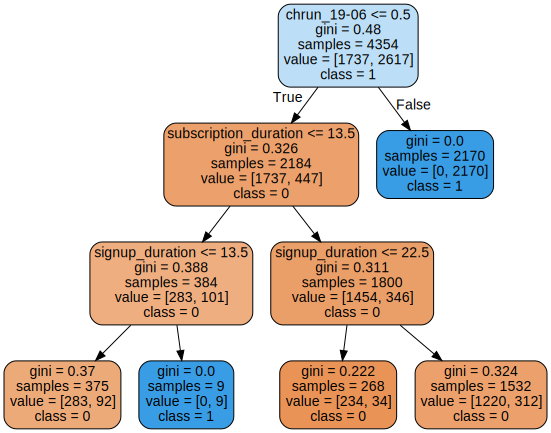

In [29]:
dt_clf = DecisionTreeClassifier(random_state=1, max_depth=3)
dt_clf.fit(X_train, y_train)

Source(export_graphviz(dt_clf, feature_names=X.columns, class_names=['0','1'], rounded = True, filled = True)) 

- 현재 이탈을 결정짓는 핵심 요인은 구독 기간, 가입 기간, 콘텐츠 시청 기간, 시청 콘텐츠 수, 19년도 6월 이탈 여부이다. 
- 구독 기간과 가입 기간이 이탈과 관련이 높으나, 장기 고객이 아닌 신규 고객의 리텐션을 확보하기 어렵다. 
- 그래서, 구독 기간과 관련된 요인을 제거하고 다시 모델링을 진행할 것이다.

### 모델링 수정 - 기간 관련 속성 제거

In [32]:
X_rvs = X.drop(['signup_duration','subscription_duration','chrun_19-06'], axis=1)
X_rvs.shape

(5443, 26)

In [33]:
X_train_rvs, X_test_rvs, y_train_rvs, y_test_rvs = train_test_split(X_rvs,y,test_size=0.2,random_state=1,stratify=y)

In [34]:
columns_rvs = ['content_view', 'recommended_view', 'watched_duration', 'bookmark_count', 'like_count', 'dislike_count', 'rating_count']

X_train_scaled_rvs = X_train_rvs.copy()
X_train_scaled_rvs[columns_rvs] = scaler.fit_transform(X_train_scaled_rvs[columns_rvs])

X_test_scaled_rvs = X_test_rvs.copy()
X_test_scaled_rvs[columns_rvs] = scaler.transform(X_test_scaled_rvs[columns_rvs])

print(X_train_scaled_rvs.shape)
print(X_test_scaled_rvs.shape)

(4354, 26)
(1089, 26)


In [35]:
# Decision Tree
dt_clf_rvs = DecisionTreeClassifier(random_state=1)
dt_clf_rvs.fit(X_train_scaled_rvs, y_train_rvs)

dt_pred_train_rvs = dt_clf_rvs.predict(X_train_scaled_rvs)
dt_pred_test_rvs = dt_clf_rvs.predict(X_test_scaled_rvs)

print_clf_eval(y_test_rvs, dt_pred_test_rvs)

confusion matrix
[[322 112]
 [ 80 575]]
-----------------------------------------------
정확도: 0.8237. 재현율: 0.8779, 정밀도: 0.8370
F1-Score: 0.8569. AUC: 0.8099


In [36]:
# Ensembel-LightGBM(Boosting) 
lgbm_clf_rvs = LGBMClassifier(random_state=1)
lgbm_clf_rvs.fit(X_train_scaled_rvs, y_train_rvs)

lgbm_pred_train_rvs = lgbm_clf_rvs.predict(X_train_scaled_rvs)
lgbm_pred_test_rvs = lgbm_clf_rvs.predict(X_test_scaled_rvs)

print()
print_clf_eval(y_test_rvs, lgbm_pred_test_rvs)

[LightGBM] [Info] Number of positive: 2617, number of negative: 1737
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000581 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 550
[LightGBM] [Info] Number of data points in the train set: 4354, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.601056 -> initscore=0.409869
[LightGBM] [Info] Start training from score 0.409869

confusion matrix
[[414  20]
 [106 549]]
-----------------------------------------------
정확도: 0.8843. 재현율: 0.8382, 정밀도: 0.9649
F1-Score: 0.8971. AUC: 0.8960


In [37]:
params = {'n_estimators':[100,150,200],
        'max_depth':[3,6,9], 
        'min_child_samples':[3,6,9],
        'num_leaves':[6,12,18]} 

grid_cv = GridSearchCV(lgbm_clf_rvs, param_grid=params , cv=5, n_jobs=-1)
grid_cv.fit(X_train_scaled_rvs, y_train_rvs)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

[LightGBM] [Info] Number of positive: 2617, number of negative: 1737
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 550
[LightGBM] [Info] Number of data points in the train set: 4354, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.601056 -> initscore=0.409869
[LightGBM] [Info] Start training from score 0.409869
최적 하이퍼 파라미터:
 {'max_depth': 6, 'min_child_samples': 3, 'n_estimators': 100, 'num_leaves': 6}
최고 예측 정확도: 0.8884


In [38]:
lgbm_clf_fn = grid_cv.best_estimator_
lgbm_clf_fn.fit(X_train_scaled_rvs, y_train_rvs)

lgbm_pred_train_fn = lgbm_clf_fn.predict(X_train_scaled_rvs)
lgbm_pred_test_fn = lgbm_clf_fn.predict(X_test_scaled_rvs)

print()
print_clf_eval(y_test_rvs, lgbm_pred_test_fn)

[LightGBM] [Info] Number of positive: 2617, number of negative: 1737
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 550
[LightGBM] [Info] Number of data points in the train set: 4354, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.601056 -> initscore=0.409869
[LightGBM] [Info] Start training from score 0.409869

confusion matrix
[[430   4]
 [109 546]]
-----------------------------------------------
정확도: 0.8962. 재현율: 0.8336, 정밀도: 0.9927
F1-Score: 0.9062. AUC: 0.9122


### 이탈 요인 재분석

In [40]:
lgbm_imp_values_rvs = lgbm_clf_fn.feature_importances_ 
lgbm_imp_rvs = pd.Series(lgbm_imp_values_rvs, index=X_rvs.columns)
lgbm_imp_top20_rvs = lgbm_imp_rvs.sort_values(ascending=False)[:20]

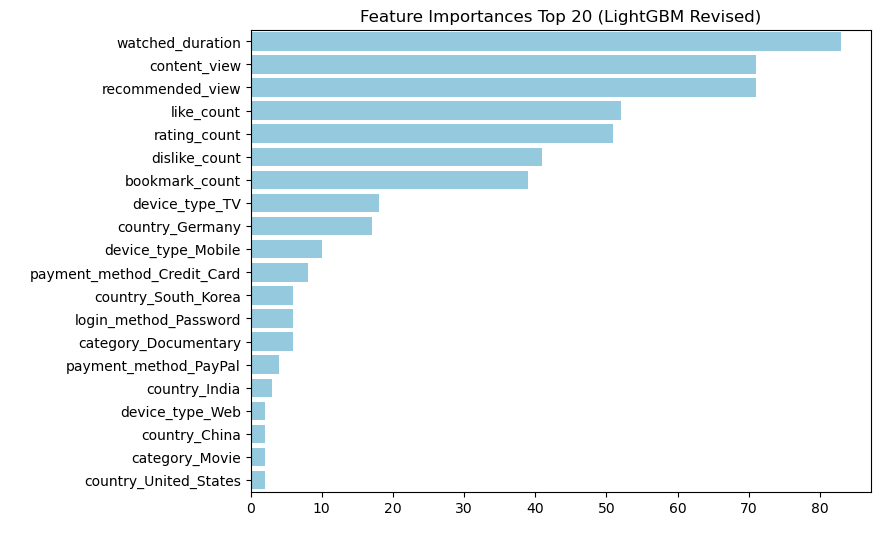

In [41]:
plt.figure(figsize=(8, 6))
plt.title('Feature Importances Top 20 (LightGBM Revised)')
sns.barplot(x=lgbm_imp_top20_rvs, y = lgbm_imp_top20_rvs.index, color='skyblue')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

- 해당 그래프는 구독 서비스에 영향을 미치는 요인이 서비스의 이용 요소와 관련됨을 보여준다.
- 컨텐츠 시청 시간, 컨텐츠 시청 수, 추천 컨텐츠 시청 수는 상위 3위 속성으로 서비스의 이용과 직접적인 관련이 있다.
- 좋아요 개수, 평가 개수, 싫어요 개수, 북마크 개수는 상호작용 관련 속성으로 서비스의 이용과 간접적인 관련이 있다.

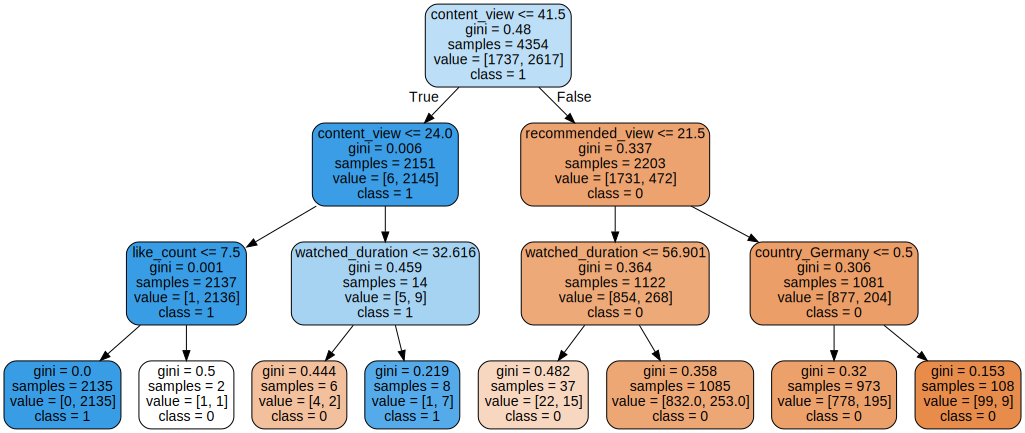

In [43]:
dt_clf_rvs = DecisionTreeClassifier(random_state=1, max_depth=3)
dt_clf_rvs.fit(X_train_rvs, y_train_rvs)

Source(export_graphviz(dt_clf_rvs, feature_names=X_rvs.columns, class_names=['0','1'], rounded = True, filled = True)) 

- 의사결정나무로 보더라도, 구독 서비스에 영향을 미치는 요인은 서비스 이용 요소와 관련이 있다.
- 컨텐츠를 얼마나 시청했는지에 따라 이탈 여부가 분리되는 것을 보면, 유저의 구독 여부는 컨텐츠의 시청에 따라 달라짐을 확인할 수 있다.

In [45]:
def summary(df, group_by_column, columns):
    
    mean = df.groupby(by=[group_by_column])[columns].mean().round(2).T
    q1 = df.groupby(by=[group_by_column])[columns].quantile(0.25).round(2).T
    q2 = df.groupby(by=[group_by_column])[columns].quantile(0.5).round(2).T
    q3 = df.groupby(by=[group_by_column])[columns].quantile(0.75).round(2).T

    summary = pd.concat([mean, q1, q2, q3], axis=1, keys=['Mean', '25%', '50%', '75%'])

    return summary

In [46]:
df['average_watch'] = df['content_view']/df['subscription_duration'] # 월별 평균 시청
columns.append('average_watch')

summary(df, 'churn', columns)

Mean           25%           50%           75%      
churn                     0.0    1.0    0.0   1.0     0.0   1.0     0.0   1.0
signup_duration         35.70  35.17  19.00  18.0   36.00  35.0   52.00  53.0
subscription_duration   35.70   6.58  19.00   1.0   36.00   1.0   52.00   1.0
content_view           110.22  19.23  90.00   0.0  109.00   0.0  129.00   0.0
recommended_view        22.10   3.80  17.00   0.0   22.00   0.0   26.00   0.0
watched_duration       114.76  19.99  93.48   0.0  113.83   0.0  134.34   0.0
bookmark_count           3.86   0.73   2.00   0.0    4.00   0.0    6.00   0.0
like_count               3.95   0.72   2.00   0.0    4.00   0.0    6.00   0.0
dislike_count            3.95   0.75   2.00   0.0    4.00   0.0    6.00   0.0
rating_count             3.95   0.75   2.00   0.0    4.00   0.0    6.00   0.0
average_watch            6.57   2.32   2.08   0.0    3.08   0.0    5.78   0.0

- 미이탈 고객의 25%는 19개월 동안 90개의 컨텐츠를 시청한다 (93시간)
- 이것은 1달에 보통 4~5개 컨텐츠를 시청한다는 의미이나, 실제 계산값은 2개로 집계되었다. 
- 다소 편중된 값이긴 하나, 이것은 초기 컨텐츠의 시청 유무가 구독 여부를 결정할 수 있음을 시사한다.

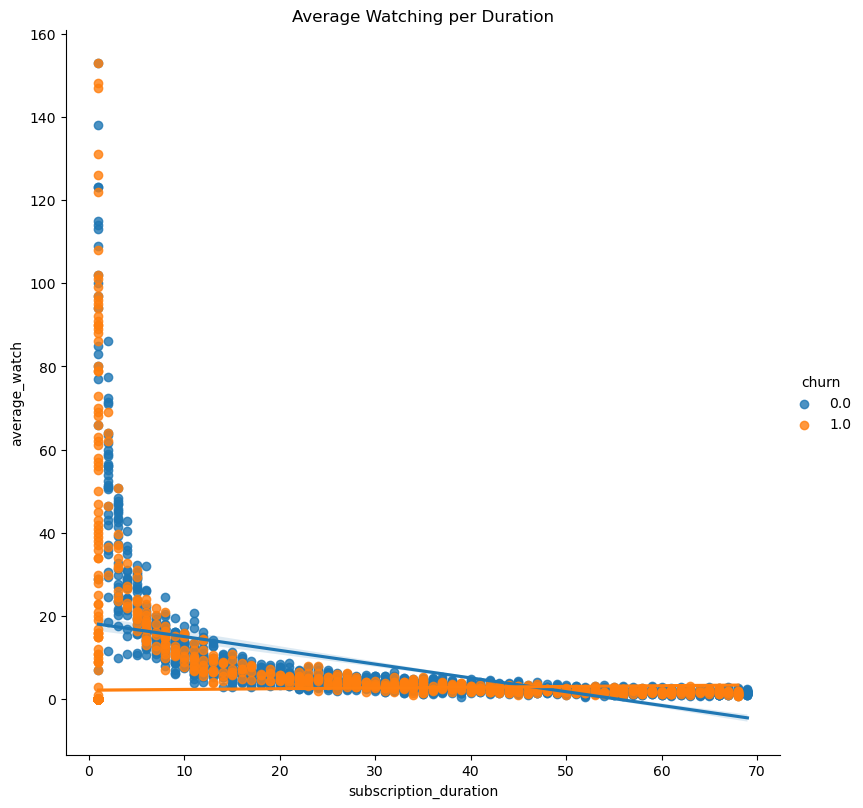

In [48]:
sns.lmplot(data=df, x='subscription_duration', y='average_watch', hue='churn', height=8)
plt.title('Average Watching per Duration')

plt.show()

In [49]:
print('평균 20시간 이상 시청 비율:', len(df[df['average_watch']>20])/len(df['average_watch']))
print('평균 20시간 이상 시청 가입기간:',df[df['average_watch']>20]['subscription_duration'].mean())

평균 20시간 이상 시청 비율: 0.03876538673525629
평균 20시간 이상 시청 가입기간: 2.772511848341232


- 구독 기간이 길어질수록, 평균 시청 시간은 감소하는 양상이 나타난다.
- 이것은 초기 사용자보다, 최근에 유입된 고객의 컨텐츠 이용이 더 많다는 것을 시사한다.
- 하지만, 상당수의 이탈 고객이 컨텐츠를 미이용했기 때문에, 최근에 이탈된 고객들 중 어떤 이유로 이탈했는지 확인할 필요가 있다

### 모델링 수정 - 서비스 미이용 고객 제외

In [52]:
customer_uw = df[df['category_Unwatched']==0]
customer_uw['churn'].value_counts()

churn
0.0    2171
1.0     615
Name: count, dtype: int64

In [53]:
X_uw = customer_uw.drop(['churn'],axis=1)
y_uw = customer_uw['churn']

In [54]:
X_train_uw, X_test_uw, y_train_uw, y_test_uw = train_test_split(X_uw, y_uw, test_size=0.3, random_state=1, stratify=y_uw)

In [55]:
X_train_scaled_uw = X_train_uw.copy()
X_train_scaled_uw[columns] = scaler.fit_transform(X_train_uw[columns])

X_test_scaled_uw = X_test_uw.copy()
X_test_scaled_uw[columns] = scaler.fit_transform(X_test_uw[columns])

In [56]:
# Ensembel-LightGBM(Boosting) 
lgbm_clf_uw = LGBMClassifier(random_state=1)
lgbm_clf_uw.fit(X_train_scaled_uw, y_train_uw)

lgbm_pred_train_uw = lgbm_clf_uw.predict(X_train_scaled_uw)
lgbm_pred_test_uw = lgbm_clf_uw.predict(X_test_scaled_uw)

print()
print_clf_eval(y_test_uw, lgbm_pred_test_uw)

[LightGBM] [Info] Number of positive: 430, number of negative: 1520
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 937
[LightGBM] [Info] Number of data points in the train set: 1950, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.220513 -> initscore=-1.262680
[LightGBM] [Info] Start training from score -1.262680

confusion matrix
[[640  11]
 [134  51]]
-----------------------------------------------
정확도: 0.8266. 재현율: 0.2757, 정밀도: 0.8226
F1-Score: 0.4130. AUC: 0.6294


In [57]:
params = {'n_estimators':[100,150,200],
        'max_depth':[3,6,9], 
        'min_child_samples':[3,6,9],
        'num_leaves':[6,12,18]} 

grid_cv = GridSearchCV(lgbm_clf_uw, param_grid=params , cv=5, n_jobs=-1)
grid_cv.fit(X_train_scaled_uw, y_train_uw)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

[LightGBM] [Info] Number of positive: 430, number of negative: 1520
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000671 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 937
[LightGBM] [Info] Number of data points in the train set: 1950, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.220513 -> initscore=-1.262680
[LightGBM] [Info] Start training from score -1.262680
최적 하이퍼 파라미터:
 {'max_depth': 9, 'min_child_samples': 3, 'n_estimators': 200, 'num_leaves': 18}
최고 예측 정확도: 0.8672


In [58]:
lgbm_clf_uw = grid_cv.best_estimator_
lgbm_clf_uw.fit(X_train_scaled_uw, y_train_uw)

lgbm_pred_train_uw = lgbm_clf_uw.predict(X_train_scaled_uw)
lgbm_pred_test_uw = lgbm_clf_uw.predict(X_test_scaled_uw)

print()
print_clf_eval(y_test_uw, lgbm_pred_test_uw)

[LightGBM] [Info] Number of positive: 430, number of negative: 1520
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 937
[LightGBM] [Info] Number of data points in the train set: 1950, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.220513 -> initscore=-1.262680
[LightGBM] [Info] Start training from score -1.262680

confusion matrix
[[649   2]
 [ 62 123]]
-----------------------------------------------
정확도: 0.9234. 재현율: 0.6649, 정밀도: 0.9840
F1-Score: 0.7935. AUC: 0.8309


- 서비스 미이용 고객을 제외하고 다시 모델링을 진행했으나, 이탈 분류 시 중요한 재현율의 성능이 크게 떨어져 사용 제한

In [60]:
summary(customer_uw, 'churn', columns)

Mean            25%            50%             75%  \
churn                     0.0     1.0    0.0    1.0     0.0     1.0     0.0   
signup_duration         35.70   38.23  19.00  20.00   36.00   40.00   52.00   
subscription_duration   35.70   30.66  19.00   9.50   36.00   31.00   52.00   
content_view           110.22  102.33  90.00  85.00  109.00  104.00  129.00   
recommended_view        22.10   20.22  17.00  16.00   22.00   20.00   26.00   
watched_duration       114.76  106.37  93.48  87.51  113.83  107.61  134.34   
bookmark_count           3.86    3.88   2.00   2.00    4.00    4.00    6.00   
like_count               3.95    3.84   2.00   1.00    4.00    3.00    6.00   
dislike_count            3.95    4.00   2.00   2.00    4.00    4.00    6.00   
rating_count             3.95    4.00   2.00   2.00    4.00    4.00    6.00   
average_watch            6.57   12.33   2.08   2.12    3.08    3.63    5.78   

                               
churn                     1.0  
signup_duration         59.00  
subscription_duration   49.50  
content_view           123.00  
recommended_view        25.00  
watched_duration       128.90  
bookmark_count           6.00  
like_count               6.00  
dislike_count            6.00  
rating_count             6.00  
average_watch           10.62

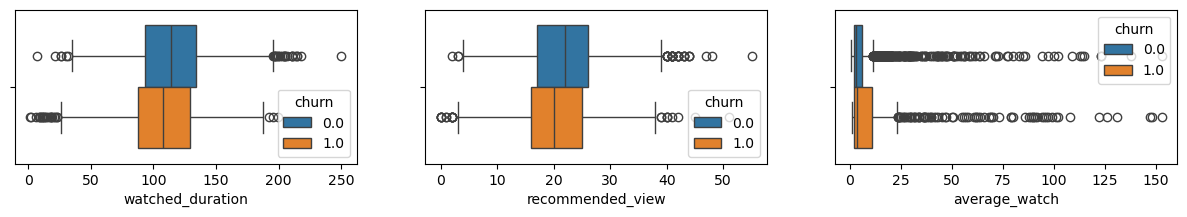

In [61]:
plt.figure(figsize=(15,2))

plt.subplot(1,3,1)
sns.boxplot(data=customer_uw, x='watched_duration', hue='churn')

plt.subplot(1,3,2)
sns.boxplot(data=customer_uw, x='recommended_view', hue='churn')

plt.subplot(1,3,3)
sns.boxplot(data=customer_uw, x='average_watch', hue='churn')

plt.show()

- 이탈 고객과 미이탈 고객 사이에 컨텐츠 이용(시간) 및 추천 컨텐츠 관람 여부에 따라 큰 차이가 나타나지 않음
- 이것은 컨텐츠의 이용 시간 외에 가격, 컨텐츠 종류(라이선스) 및 기타 요인이 구독 여부에 영향을 미침을 시사함

### 모델링 수정 - 구독기간

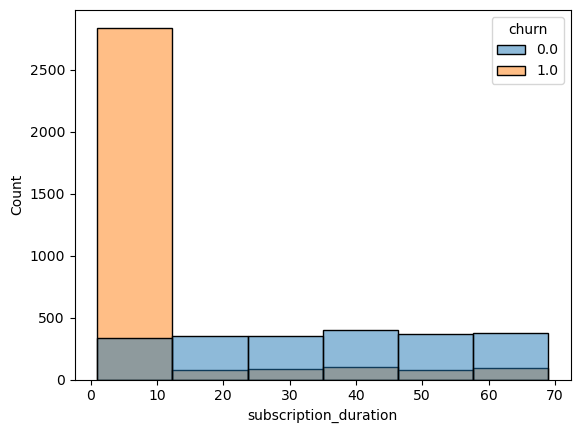

In [64]:
sns.histplot(data=df, x='subscription_duration', bins=6, hue='churn')
plt.show()

In [66]:
def customer_segmentation(x):
    if x<=6:
        status = 1 # 신규 고객 (6개월 이내 가입)
    elif x<=12:
        status = 2 # 단기 고객 (6개월~1년 이내 가입)
    elif x<=24:
        status = 3 # 중기 고객 (1년~2년 이내 가입)
    else:
        status = 4 # 장기 고객 (2년 이상 가입)
    return status

In [67]:
df['seg'] = df['subscription_duration'].apply(lambda x:customer_segmentation(x))
np.unique(df['seg'], return_counts=True)

(array([1, 2, 3, 4], dtype=int64),
 array([2935,  235,  470, 1803], dtype=int64))

In [68]:
seg_df = pd.DataFrame(df.groupby('seg')['churn'].value_counts())
seg_df = seg_df.reset_index()

seg_df['total'] = seg_df.groupby('seg')['count'].transform('sum')
seg_df['ratio'] = seg_df['count'] / seg_df['total']

seg_df

,seg,churn,count,total,ratio
0,1,1.0,2781,2935,0.947530
1,1,0.0,154,2935,0.052470
2,2,0.0,178,235,0.757447
3,2,1.0,57,235,0.242553
4,3,0.0,386,470,0.821277
5,3,1.0,84,470,0.178723
6,4,0.0,1453,1803,0.805879
7,4,1.0,350,1803,0.194121


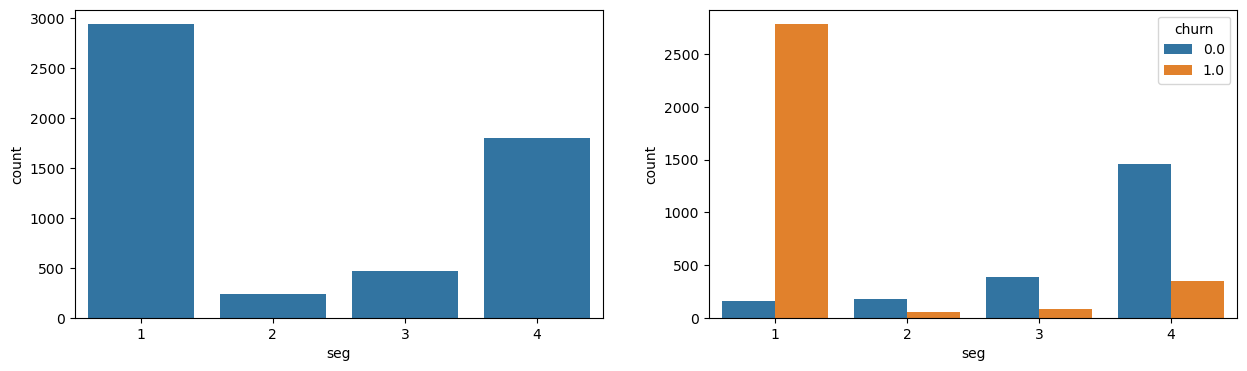

In [69]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.countplot(data=df, x='seg')

plt.subplot(1,2,2)
sns.countplot(data=df, x='seg', hue='churn')

plt.show()

#### 신규 고객

In [71]:
seg1 = df[df['seg']==1]

X_seg1 = seg1.drop(['churn','signup_duration','subscription_duration'], axis=1)
y_seg1 = seg1['churn']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_seg1, y_seg1, test_size=0.2, random_state=1, stratify=y_seg1)

lgbm_clf_seg = LGBMClassifier(random_state=1)
lgbm_clf_seg.fit(X_train1, y_train1)
lgbm_pred_seg1 = lgbm_clf_seg.predict(X_test1)

print()
print_clf_eval(y_test1, lgbm_pred_seg1)

[LightGBM] [Info] Number of positive: 2225, number of negative: 123
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 2348, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.947615 -> initscore=2.895328
[LightGBM] [Info] Start training from score 2.895328
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

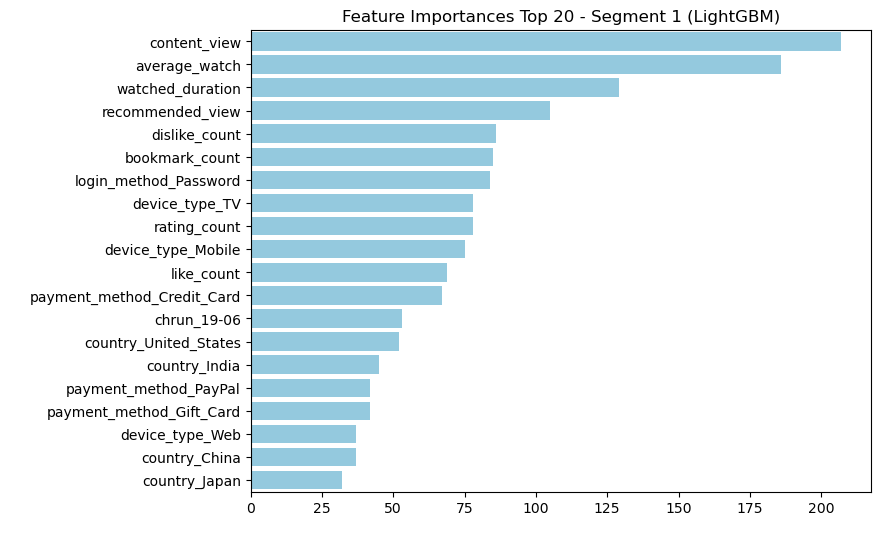

In [72]:
lgbm_imp_values_seg1 = lgbm_clf_seg.feature_importances_ 
lgbm_imp_seg1 = pd.Series(lgbm_imp_values_seg1, index=X_seg1.columns)
lgbm_imp_top20_seg1 = lgbm_imp_seg1.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature Importances Top 20 - Segment 1 (LightGBM)')
sns.barplot(x=lgbm_imp_top20_seg1, y = lgbm_imp_top20_seg1.index, color='skyblue')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

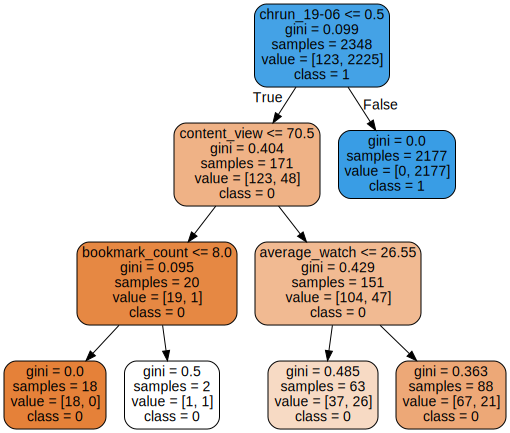

In [73]:
dt_clf = DecisionTreeClassifier(random_state=1, max_depth=3)
dt_clf.fit(X_train1, y_train1)

Source(export_graphviz(dt_clf, feature_names=X_train1.columns, class_names=['0','1'], rounded = True, filled = True)) 

In [74]:
summary(seg1,'churn',columns)

Mean           25%           50%           75%      
churn                     0.0    1.0    0.0   1.0     0.0   1.0     0.0   1.0
signup_duration          3.58  34.52   2.00  17.0    3.00  34.0    5.00  53.0
subscription_duration    3.58   1.06   2.00   1.0    3.00   1.0    5.00   1.0
content_view           105.68   3.36  84.25   0.0  108.50   0.0  127.75   0.0
recommended_view        21.05   0.65  17.00   0.0   21.00   0.0   25.75   0.0
watched_duration       109.80   3.48  87.36   0.0  114.11   0.0  133.88   0.0
bookmark_count           3.95   0.19   2.00   0.0    4.00   0.0    6.00   0.0
like_count               4.02   0.17   2.00   0.0    4.00   0.0    6.00   0.0
dislike_count            4.15   0.16   2.00   0.0    4.00   0.0    6.00   0.0
rating_count             3.93   0.19   2.00   0.0    4.00   0.0    6.00   0.0
average_watch           39.54   1.98  19.75   0.0   29.22   0.0   49.96   0.0

#### 단기 고객

In [76]:
seg2 = df[df['seg']==2]

X_seg2 = seg2.drop(['churn','signup_duration','subscription_duration'], axis=1)
y_seg2 = seg2['churn']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_seg2, y_seg2, test_size=0.2, random_state=1, stratify=y_seg2)

lgbm_clf_seg = LGBMClassifier(random_state=1)
lgbm_clf_seg.fit(X_train2, y_train2)
lgbm_pred_seg2 = lgbm_clf_seg.predict(X_test2)

print()
print_clf_eval(y_test2, lgbm_pred_seg2)

[LightGBM] [Info] Number of positive: 46, number of negative: 142
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 281
[LightGBM] [Info] Number of data points in the train set: 188, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.244681 -> initscore=-1.127186
[LightGBM] [Info] Start training from score -1.127186
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

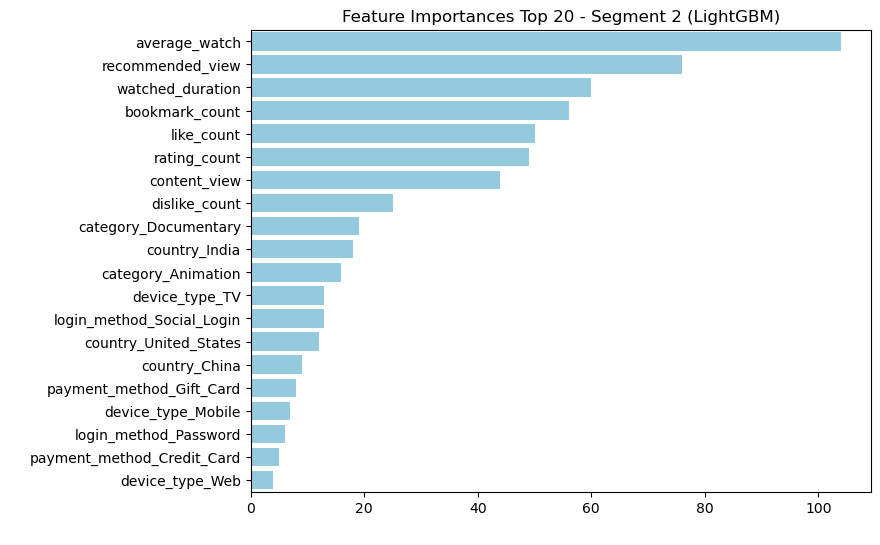

In [77]:
lgbm_imp_values_seg2 = lgbm_clf_seg.feature_importances_ 
lgbm_imp_seg2 = pd.Series(lgbm_imp_values_seg2, index=X_seg2.columns)
lgbm_imp_top20_seg2 = lgbm_imp_seg2.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature Importances Top 20 - Segment 2 (LightGBM)')
sns.barplot(x=lgbm_imp_top20_seg2, y = lgbm_imp_top20_seg2.index, color='skyblue')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

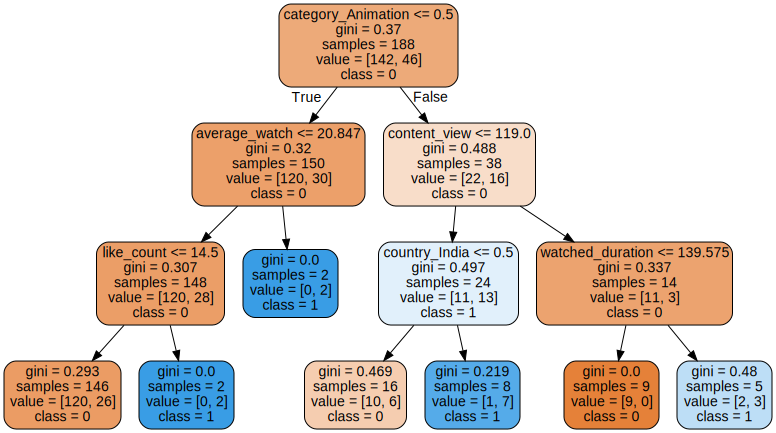

In [78]:
dt_clf = DecisionTreeClassifier(random_state=1, max_depth=3)
dt_clf.fit(X_train2, y_train2)

Source(export_graphviz(dt_clf, feature_names=X_train2.columns, class_names=['0','1'], rounded = True, filled = True)) 

In [79]:
summary(seg2,'churn',columns)

Mean            25%            50%             75%  \
churn                     0.0     1.0    0.0    1.0     0.0     1.0     0.0   
signup_duration          9.75   10.47   8.00   9.00   10.00   10.00   11.00   
subscription_duration    9.75    9.47   8.00   8.00   10.00    9.00   11.00   
content_view           111.31  110.95  86.25  92.00  110.00  106.00  130.75   
recommended_view        22.09   22.72  17.00  18.00   21.00   20.00   26.00   
watched_duration       116.40  117.12  92.29  96.58  113.10  110.39  136.42   
bookmark_count           3.99    3.82   2.00   2.00    4.00    4.00    6.00   
like_count               3.77    4.95   2.00   3.00    3.00    4.00    6.00   
dislike_count            3.67    4.56   1.00   2.00    3.00    4.00    5.75   
rating_count             4.13    4.26   2.00   2.00    4.00    4.00    6.00   
average_watch           11.80   12.11   8.61   9.73   11.48   11.80   14.31   

                               
churn                     1.0  
signup_duration         12.00  
subscription_duration   11.00  
content_view           127.00  
recommended_view        26.00  
watched_duration       137.76  
bookmark_count           5.00  
like_count               7.00  
dislike_count            6.00  
rating_count             6.00  
average_watch           14.75

#### 중기 고객

In [81]:
seg3 = df[df['seg']==3]

X_seg3 = seg3.drop(['churn','signup_duration','subscription_duration'], axis=1)
y_seg3 = seg3['churn']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_seg3, y_seg3, test_size=0.2, random_state=1, stratify=y_seg3)

lgbm_clf_seg = LGBMClassifier(random_state=1)
lgbm_clf_seg.fit(X_train3, y_train3)
lgbm_pred_seg3 = lgbm_clf_seg.predict(X_test3)

print()
print_clf_eval(y_test3, lgbm_pred_seg3)

[LightGBM] [Info] Number of positive: 67, number of negative: 309
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 443
[LightGBM] [Info] Number of data points in the train set: 376, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.178191 -> initscore=-1.528649
[LightGBM] [Info] Start training from score -1.528649
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

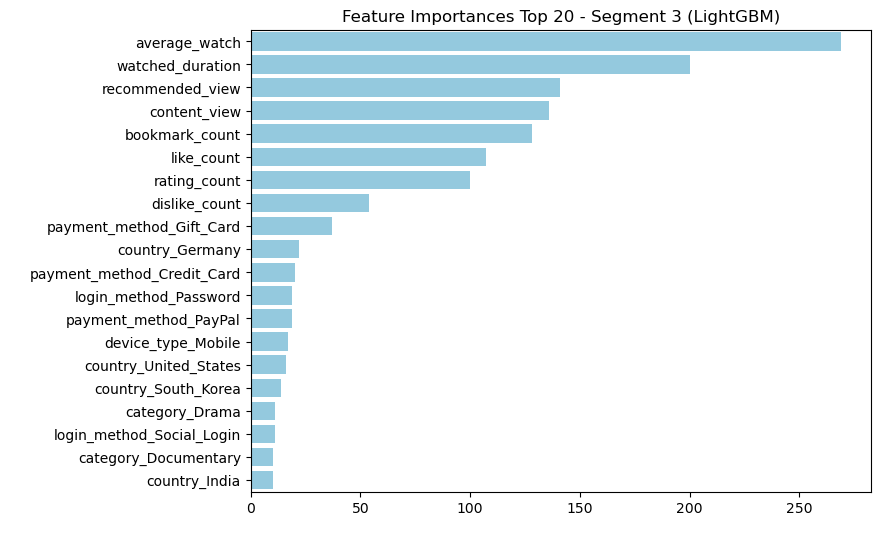

In [82]:
lgbm_imp_values_seg3 = lgbm_clf_seg.feature_importances_ 
lgbm_imp_seg3 = pd.Series(lgbm_imp_values_seg3, index=X_seg3.columns)
lgbm_imp_top20_seg3 = lgbm_imp_seg3.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature Importances Top 20 - Segment 3 (LightGBM)')
sns.barplot(x=lgbm_imp_top20_seg3, y = lgbm_imp_top20_seg3.index, color='skyblue')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

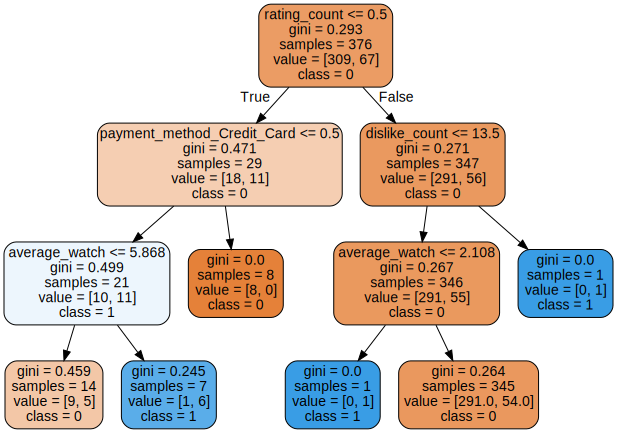

In [83]:
dt_clf = DecisionTreeClassifier(random_state=1, max_depth=3)
dt_clf.fit(X_train3, y_train3)

Source(export_graphviz(dt_clf, feature_names=X_train3.columns, class_names=['0','1'], rounded = True, filled = True)) 

In [84]:
summary(seg3,'churn',columns)

Mean            25%            50%             75%  \
churn                     0.0     1.0    0.0    1.0     0.0     1.0     0.0   
signup_duration         18.59   19.86  15.00  16.00   19.00   21.00   22.00   
subscription_duration   18.59   18.86  15.00  15.00   19.00   20.00   22.00   
content_view           108.25  108.36  90.00  88.75  109.00  109.00  124.75   
recommended_view        21.70   20.67  17.00  15.00   21.00   20.00   25.00   
watched_duration       112.73  112.35  93.07  93.48  112.42  112.09  129.34   
bookmark_count           3.85    3.49   2.00   1.00    3.00    3.00    6.00   
like_count               3.80    3.71   2.00   1.00    3.00    3.00    5.00   
dislike_count            3.84    3.74   2.00   1.00    3.50    4.00    6.00   
rating_count             3.76    3.74   2.00   1.00    3.00    4.00    6.00   
average_watch            6.05    5.97   4.66   4.65    5.84    5.50    7.15   

                               
churn                     1.0  
signup_duration         23.00  
subscription_duration   22.00  
content_view           120.25  
recommended_view        24.00  
watched_duration       129.16  
bookmark_count           5.00  
like_count               5.00  
dislike_count            5.00  
rating_count             6.00  
average_watch            6.83

#### 장기 고객

In [86]:
seg4 = df[df['seg']==4]

X_seg4 = seg4.drop(['churn','signup_duration','subscription_duration'], axis=1)
y_seg4 = seg4['churn']

X_train4, X_test4, y_train4, y_test4 = train_test_split(X_seg4, y_seg4, test_size=0.2, random_state=1,stratify=y_seg4)

lgbm_clf_seg = LGBMClassifier(random_state=1)
lgbm_clf_seg.fit(X_train4, y_train4)
lgbm_pred_seg4 = lgbm_clf_seg.predict(X_test4)

print()
print_clf_eval(y_test4, lgbm_pred_seg4)

[LightGBM] [Info] Number of positive: 280, number of negative: 1162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 1442, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.194175 -> initscore=-1.423108
[LightGBM] [Info] Start training from score -1.423108

confusion matrix
[[281  10]
 [ 70   0]]
-----------------------------------------------
정확도: 0.7784. 재현율: 0.0000, 정밀도: 0.0000
F1-Score: 0.0000. AUC: 0.4828


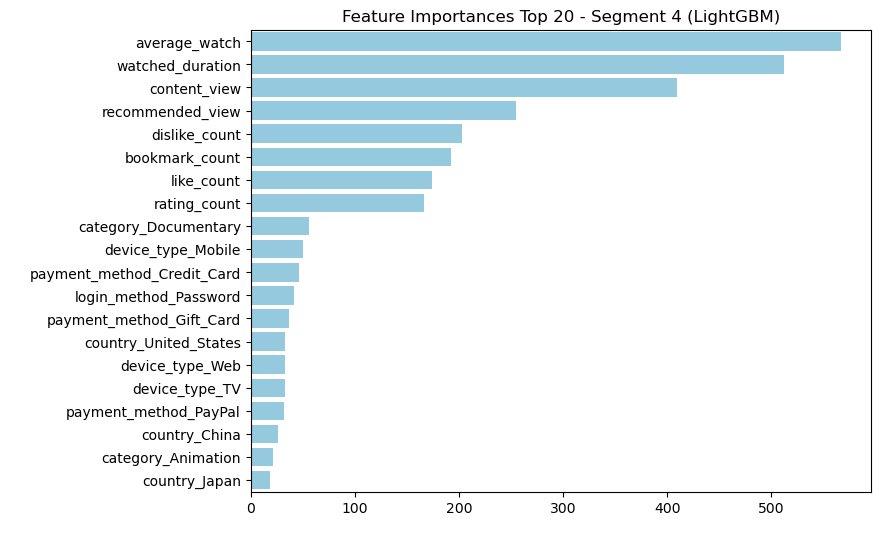

In [87]:
lgbm_imp_values_seg4 = lgbm_clf_seg.feature_importances_ 
lgbm_imp_seg4 = pd.Series(lgbm_imp_values_seg4, index=X_seg4.columns)
lgbm_imp_top20_seg4 = lgbm_imp_seg4.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature Importances Top 20 - Segment 4 (LightGBM)')
sns.barplot(x=lgbm_imp_top20_seg4, y = lgbm_imp_top20_seg4.index, color='skyblue')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

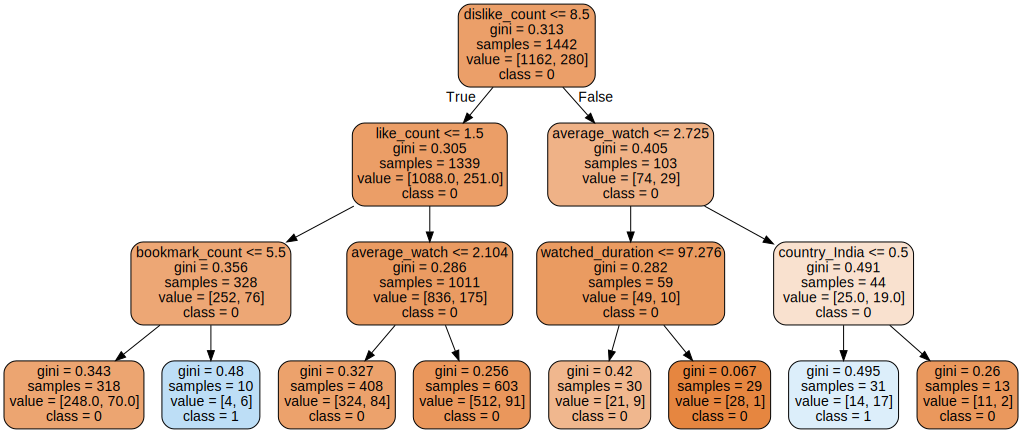

In [88]:
dt_clf = DecisionTreeClassifier(random_state=1, max_depth=3)
dt_clf.fit(X_train4, y_train4)

Source(export_graphviz(dt_clf, feature_names=X_train4.columns, class_names=['0','1'], rounded = True, filled = True)) 

In [89]:
summary(seg4,'churn',columns)

Mean            25%            50%             75%  \
churn                     0.0     1.0    0.0    1.0     0.0     1.0     0.0   
signup_duration         46.82   47.98  36.00  36.25   47.00   47.00   58.00   
subscription_duration   46.82   46.98  36.00  35.25   47.00   46.00   58.00   
content_view           111.10  109.01  91.00  89.00  110.00  109.00  129.00   
recommended_view        22.31   21.71  17.00  17.00   22.00   21.00   27.00   
watched_duration       115.62  113.20  94.37  91.92  114.32  112.56  135.55   
bookmark_count           3.84    3.84   2.00   1.25    4.00    3.00    6.00   
like_count               4.00    3.68   2.00   1.00    4.00    3.00    6.00   
dislike_count            3.99    4.13   2.00   2.00    4.00    4.00    6.00   
rating_count             3.98    3.94   2.00   1.00    4.00    4.00    6.00   
average_watch            2.58    2.52   1.82   1.78    2.34    2.30    3.14   

                               
churn                     1.0  
signup_duration         59.00  
subscription_duration   58.00  
content_view           128.00  
recommended_view        26.00  
watched_duration       133.25  
bookmark_count           6.00  
like_count               6.00  
dislike_count            6.00  
rating_count             6.00  
average_watch            3.08

---

### 군집 분석 (미사용)

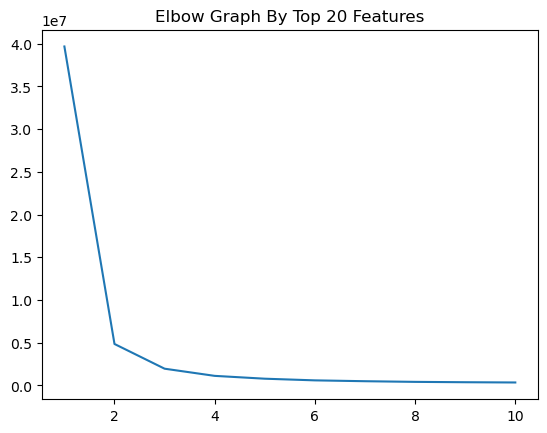

In [92]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=1)
    wcss.append(km.fit(X_rvs[lgbm_imp_rvs.index]).inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Graph By Top 20 Features')
plt.show()

In [93]:
km3 = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=1)
label = km3.fit_predict(X_rvs[lgbm_imp_rvs.index])

In [94]:
pca = PCA(n_components=2)
transformed = pca.fit_transform(X_rvs[lgbm_imp_rvs.index])
pca_df = pd.DataFrame(data=pca.components_.T, index=X_rvs.columns, columns=['ftr1','ftr2'])

In [95]:
df['ftr1'] = transformed[:,0]
df['ftr2'] = transformed[:,1]
df['label'] = label

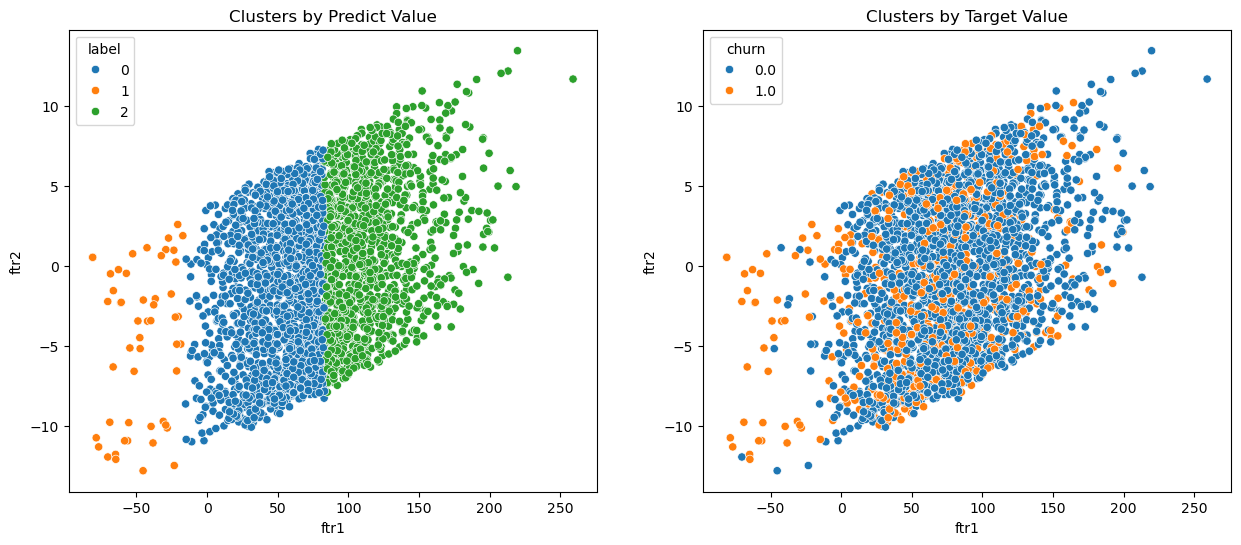

label  churn
0      0.0      1165
       1.0       347
1      1.0      2693
       0.0        13
2      0.0       993
       1.0       232
Name: count, dtype: int64

In [96]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
sns.scatterplot(data=df, x='ftr1', y='ftr2', hue='label',palette=["#1f77b4", "#ff7f0e", "#2ca02c"])
plt.title('Clusters by Predict Value')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='ftr1', y='ftr2', hue='churn')
plt.title('Clusters by Target Value')
plt.show()

df.groupby(by=['label'])['churn'].value_counts()

- Feature Importance 값에 기반하여 군집을 형성하였을 때, 이탈 인원의 약 80%가 실제값과 맞게 잘 분류되었으나, 약 20%는 잘 구분하지 못하는 것으로 나타났다.
- 미이탈 인원 군집(0, 2)에서 전체 인원의 약 20%가 이탈 위험이 있는 것으로 나타났고, 군집을 나눈 기준은 컨텐츠 시청 횟수, 시간, 추천 컨텐츠 시청으로 확인된다.
- 미이탈 군집은 컨텐츠 시청 시간이 길어지더라도 이탈에 영향이 없음을 시사한다.

In [98]:
df.groupby(by=['label'])[['signup_duration', 'subscription_duration','content_view', 'recommended_view', 'watched_duration',
                           'bookmark_count', 'like_count', 'dislike_count', 'rating_count','category_Animation', 'category_Documentary', 
                           'category_Drama', 'category_Movie']].mean().round(2)

,signup_duration,subscription_duration,content_view,recommended_view,watched_duration,bookmark_count,like_count,dislike_count,rating_count,category_Animation,category_Documentary,category_Drama,category_Movie
label,,,,,,,,,,,,,
0,35.88,34.51,89.89,17.94,93.03,3.87,3.90,3.97,3.98,0.19,0.45,0.19,0.18
1,34.76,1.11,0.45,0.09,0.46,0.07,0.06,0.05,0.07,0.00,0.01,0.00,0.00
2,36.13,35.79,134.76,26.97,140.94,3.87,3.98,4.00,3.94,0.19,0.45,0.15,0.21


In [99]:
# 군집(0) 이탈/미이탈 비교
print(df[(df['label']==0)&(df['churn']==0)][['signup_duration', 'subscription_duration','content_view', 'recommended_view', 'watched_duration',
                                             'bookmark_count', 'like_count', 'dislike_count', 'rating_count','category_Animation', 
                                             'category_Documentary', 'category_Drama', 'category_Movie']].mean().round(2))
print()
print(df[(df['label']==0)&(df['churn']==1)][['signup_duration', 'subscription_duration','content_view', 'recommended_view', 'watched_duration',
                                             'bookmark_count', 'like_count', 'dislike_count', 'rating_count','category_Animation', 
                                             'category_Documentary', 'category_Drama', 'category_Movie']].mean().round(2))

signup_duration          35.67
subscription_duration    35.67
content_view             90.00
recommended_view         17.99
watched_duration         93.12
bookmark_count            3.81
like_count                3.88
dislike_count             3.94
rating_count              3.96
category_Animation        0.18
category_Documentary      0.45
category_Drama            0.19
category_Movie            0.18
dtype: float64

signup_duration          36.59
subscription_duration    30.59
content_view             89.52
recommended_view         17.77
watched_duration         92.71
bookmark_count            4.05
like_count                3.94
dislike_count             4.07
rating_count              4.04
category_Animation        0.21
category_Documentary      0.44
category_Drama            0.17
category_Movie            0.18
dtype: float64


In [100]:
# 군집(2) 이탈/미이탈 비교
print(df[(df['label']==2)&(df['churn']==0)][['signup_duration', 'subscription_duration','content_view', 'recommended_view', 'watched_duration',
                                             'bookmark_count', 'like_count', 'dislike_count', 'rating_count','category_Animation', 
                                             'category_Documentary', 'category_Drama', 'category_Movie']].mean().round(2))
print()
print(df[(df['label']==2)&(df['churn']==1)][['signup_duration', 'subscription_duration','content_view', 'recommended_view', 'watched_duration',
                                             'bookmark_count', 'like_count', 'dislike_count', 'rating_count','category_Animation', 
                                             'category_Documentary', 'category_Drama', 'category_Movie']].mean().round(2))

signup_duration           35.92
subscription_duration     35.92
content_view             134.95
recommended_view          27.12
watched_duration         141.22
bookmark_count             3.92
like_count                 4.03
dislike_count              3.98
rating_count               3.92
category_Animation         0.19
category_Documentary       0.44
category_Drama             0.15
category_Movie             0.22
dtype: float64

signup_duration           37.02
subscription_duration     35.23
content_view             133.96
recommended_view          26.30
watched_duration         139.77
bookmark_count             3.62
like_count                 3.74
dislike_count              4.06
rating_count               4.01
category_Animation         0.17
category_Documentary       0.49
category_Drama             0.15
category_Movie             0.19
dtype: float64
